In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
(trainx,trainy),(testx,testy) = keras.datasets.mnist.load_data()

In [2]:
trainx=trainx/255.0
testx=testx/255.0

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import pickle
train4imagesx=pickle.load(open('drive/MyDrive/train4imagesx.pkl', 'rb'))
train4imagesy=pickle.load(open('drive/MyDrive/train4imagesy.pkl', 'rb'))
test4imagesx=pickle.load(open('drive/MyDrive/test4imagesx.pkl', 'rb'))
test4imagesy=pickle.load(open('drive/MyDrive/test4imagesy.pkl', 'rb'))


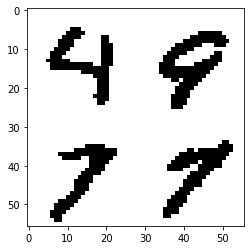

In [5]:
plt.imshow(test4imagesy[399][:,:,10],cmap='gray')

In [6]:
train4imagesx=np.array(train4imagesx)
train4imagesx=train4imagesx.astype(np.float32)
train4imagesy=np.array(train4imagesy)
train4imagesy=train4imagesy.astype(np.float32)
test4imagesx=np.array(test4imagesx)
test4imagesx=test4imagesx.astype(np.float32)
test4imagesy=np.array(test4imagesy)
test4imagesy=test4imagesy.astype(np.float32)

In [7]:
import tensorflow.keras.layers as KL
import tensorflow.keras.models as KM
input=KL.Input(shape=(56,56,1))
conv1=KL.Conv2D(16,(3,3),padding="same",activation="relu")(input)
conv1=KL.Conv2D(16,(3,3),padding="same",activation="relu")(conv1)
max1=KL.MaxPooling2D(2)(conv1)
conv2=KL.Conv2D(32,(3,3),padding="same",activation="relu")(max1)
conv2=KL.Conv2D(32,(3,3),padding="same",activation="relu")(conv2)
max2=KL.MaxPooling2D(2)(conv2)
conv3=KL.Conv2D(64,(3,3),padding="same",activation="relu")(max2)
conv3=KL.Conv2D(64,(3,3),padding="same",activation="relu")(conv3)
max3=KL.MaxPooling2D(2)(conv3)
conv4=KL.Conv2D(128,(3,3),padding="same",activation="relu")(max3)
conv4=KL.Conv2D(128,(3,3),padding="same",activation="relu")(conv4)#7*7*128

transconv1=KL.Conv2DTranspose(64,(2,2),strides=(2,2),padding="same")(conv4)#14*14*64
transconv1=KL.Concatenate()([transconv1,conv3])#14*14*128
conv5=KL.Conv2D(64,(3,3),padding="same",activation="relu")(transconv1)
conv5=KL.Conv2D(64,(3,3),padding="same",activation="relu")(conv5)#14*14*64
transconv2=KL.Conv2DTranspose(32,(2,2),strides=(2,2),padding="same")(conv5)#28*28*32
transconv2=KL.Concatenate()([transconv2,conv2])#28*28*64
conv6=KL.Conv2D(32,(3,3),padding="same",activation="relu")(transconv2)
conv6=KL.Conv2D(32,(3,3),padding="same",activation="relu")(conv6)#28*28*32

transconv3=KL.Conv2DTranspose(16,(2,2),strides=(2,2),padding="same")(conv6)#56*56*16
transconv3=KL.Concatenate()([transconv3,conv1])#56*56*32
conv7=KL.Conv2D(16,(3,3),padding="same",activation="relu")(transconv3)#56*56*16

output=KL.Conv2D(11,(3,3),padding="same",activation="sigmoid")(conv7)
customunet=KM.Model(input,output)
customunet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 56, 56, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 56, 56, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 56, 56, 16)   2320        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 28, 28, 16)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [8]:
customunet.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy)

In [9]:
customunet.fit(train4imagesx,train4imagesy,batch_size=64,epochs=20)

Epoch 1/20
235/235 [==============================] - 37s 31ms/step - loss: 0.9113
Epoch 2/20
235/235 [==============================] - 7s 29ms/step - loss: 0.2669
Epoch 3/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0537
Epoch 4/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0194
Epoch 5/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0115
Epoch 6/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0076
Epoch 7/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0050
Epoch 8/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0045
Epoch 9/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0034
Epoch 10/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0034
Epoch 11/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0022
Epoch 12/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0027
Epoch 13/20


In [102]:
predictions=customunet.predict(test4imagesx)

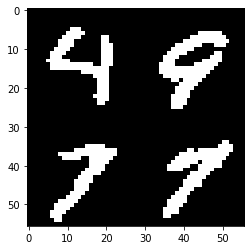

In [188]:
plt.imshow(test4imagesx[399],cmap='gray')

In [109]:
def thresholding(im,thres):
    result=np.zeros((56,56))
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i][j]>=thres:
                result[i][j]=1
    return result

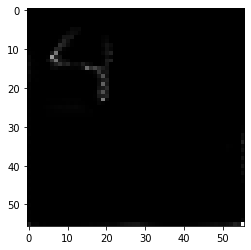

In [111]:
plt.imshow(predictions[399][:,:,0],cmap='gray')

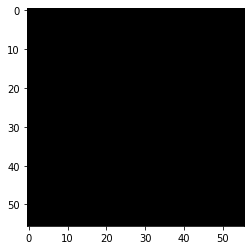

In [165]:
plt.imshow(thresholding(predictions[399][:,:,0],0.985),cmap='gray')

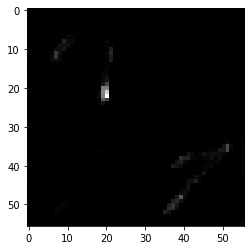

In [166]:
plt.imshow(predictions[399][:,:,1],cmap='gray')

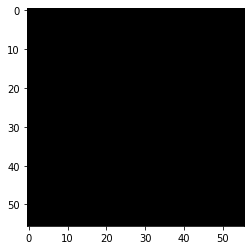

In [167]:
plt.imshow(thresholding(predictions[399][:,:,1],0.985),cmap='gray')

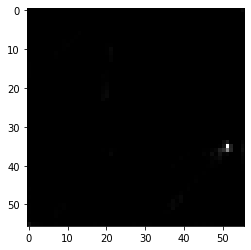

In [168]:
plt.imshow((predictions[399][:,:,2]),cmap='gray')

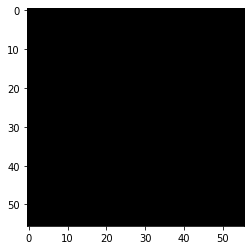

In [169]:
plt.imshow(thresholding(predictions[399][:,:,2],0.985),cmap='gray')

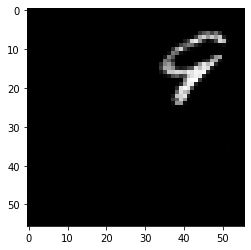

In [170]:
plt.imshow(predictions[399][:,:,3],cmap='gray')

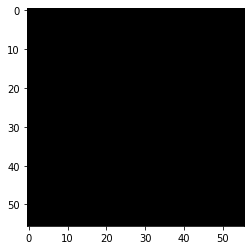

In [171]:
plt.imshow(thresholding(predictions[399][:,:,3],0.985),cmap='gray')

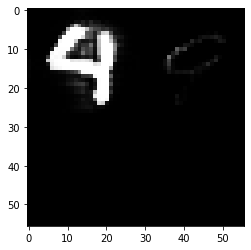

In [172]:
plt.imshow(predictions[399][:,:,4],cmap='gray')

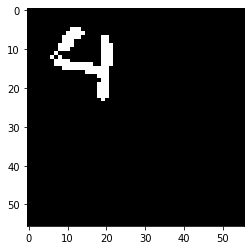

In [173]:
plt.imshow(thresholding(predictions[399][:,:,4],0.985),cmap='gray')

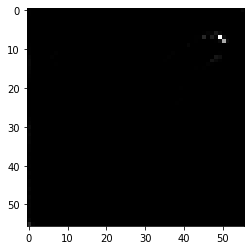

In [174]:
plt.imshow(predictions[399][:,:,5],cmap='gray')

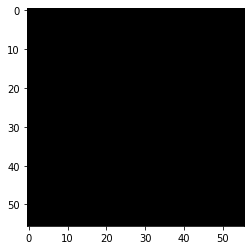

In [175]:
plt.imshow(thresholding(predictions[399][:,:,5],0.985),cmap='gray')

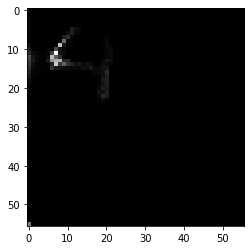

In [176]:
plt.imshow(predictions[399][:,:,6],cmap='gray')

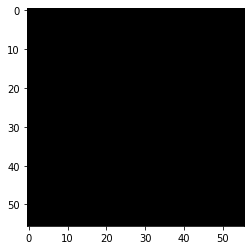

In [177]:
plt.imshow(thresholding(predictions[399][:,:,6],0.985),cmap='gray')

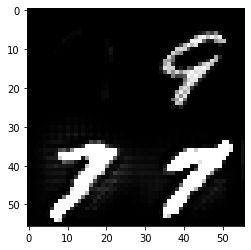

In [178]:
plt.imshow(predictions[399][:,:,7],cmap='gray')

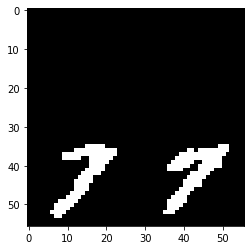

In [179]:
plt.imshow(thresholding(predictions[399][:,:,7],0.985),cmap='gray')

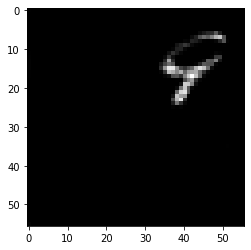

In [180]:
plt.imshow(predictions[399][:,:,8],cmap='gray')

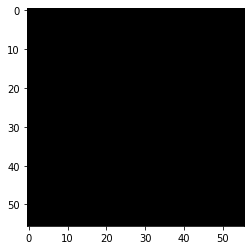

In [181]:
plt.imshow(thresholding(predictions[399][:,:,8],0.985),cmap='gray')

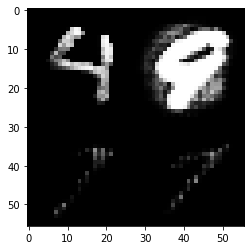

In [182]:
plt.imshow(predictions[399][:,:,9],cmap='gray')

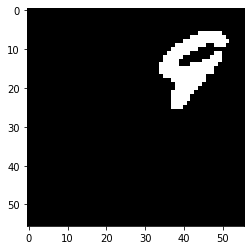

In [183]:
plt.imshow(thresholding(predictions[399][:,:,9],0.985),cmap='gray')

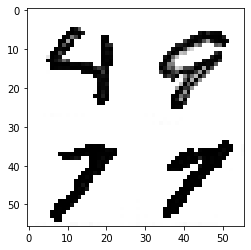

In [184]:
plt.imshow(predictions[399][:,:,10],cmap='gray')

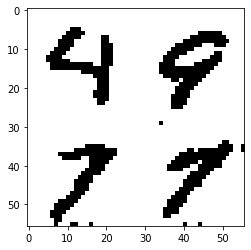

In [185]:
plt.imshow(thresholding(predictions[399][:,:,10],0.985),cmap='gray')

In [133]:
def jaccardscore(map1,map2):
    intersection=0
    class1=0
    class2=0
    for i in range(56):
        for j in range(56):
            if map1[i][j]==1:
                class1=class1+1
            if map2[i][j]==1:
                class2=class2+1
            if map1[i][j]==1 and map2[i][j]==1:
                intersection=intersection+1
    return (intersection+0.0001)/(class1+class2-intersection+0.0001)
            

In [186]:
jaccardscore(test4imagesy[399][:,:,7],thresholding(predictions[399][:,:,7],0.985))

0.9361702399275574

In [136]:
test4imagesx.shape

(1000, 56, 56)

In [163]:
avgofall=0
for j in range(1000):
    avg=0
    for i in range(11):
        avg=avg+jaccardscore(test4imagesy[j][:,:,i],thresholding(predictions[j][:,:,i],0.985))
    avg=avg/11
    avgofall=avgofall+avg
avgofall=avgofall/1000

In [164]:
avgofall

0.9204527383628228

In [36]:
# from keras.models import load_model

# customunet.save('foregroundextractorQ4usingsoftmax.h5')    

In [37]:
# from keras.models import load_model

# customunet.save('foregroundextractorQ4final.h5')    

In [101]:
customunet = keras.models.load_model('drive/MyDrive/foregroundextractorQ4final.h5')
0.9204527383628228
